In [ ]:
#Importing Library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
scaler = StandardScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Define unnecessary columns of data <br>
Needed to choose what features will be used for correlation check and further augmentation

In [ ]:
unnes_column = []
for i in range(78,-1,-1):
  unnes_column.append(i)
for i in range(14):
  unnes_column.remove(i)
print(unnes_column)

[78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14]


Function to rename columns

In [ ]:
def rename_col_by_index(dataframe, index_mapping):
    dataframe.columns = [index_mapping.get(i, col) for i, col in enumerate(dataframe.columns)]
    return dataframe

#Import real data
Dataset is chosen here. All unnecessary features removed to find better correlation. <br>
All features renamed to have unified

In [ ]:
#importing real data
df_r=pd.read_csv('/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
for i in range(len(unnes_column)):
  removed_column = unnes_column[i]
  df_r= df_r.drop(df_r.columns[removed_column], axis=1)

df_r.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0


In [ ]:
normalized_df = (df_r-df_r.min())/(df_r.max()-df_r.min())
for i in range(len(normalized_df.axes[1])):
  new_id = 'p'+str((i+1))
  new_column_mapping = {i: new_id}
  df_r = rename_col_by_index(normalized_df, new_column_mapping)
print(unnes_column)
normalized_df.head(3)


[78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14]


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14
0,0.891563,2.500039e-08,0.000595,0.00000,0.000099,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,0.000000,0.000000,0.0
1,0.894634,9.083476e-07,0.000000,0.00034,0.000050,0.000001,0.000514,0.004076,0.001552,0.0,0.000517,0.004161,0.001552,0.0
2,0.894650,4.333402e-07,0.000000,0.00034,0.000050,0.000001,0.000514,0.004076,0.001552,0.0,0.000517,0.004161,0.001552,0.0


process dataset to have better plot

In [ ]:
for i in range(len(df_r.axes[1])):
  new_id = 'p'+str((i+1))
  new_column_mapping = {i: new_id}
  df_r = rename_col_by_index(df_r, new_column_mapping)
print(unnes_column)
df_r.head(3)

[78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14]


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14
0,0.891563,2.500039e-08,0.000595,0.00000,0.000099,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,0.000000,0.000000,0.0
1,0.894634,9.083476e-07,0.000000,0.00034,0.000050,0.000001,0.000514,0.004076,0.001552,0.0,0.000517,0.004161,0.001552,0.0
2,0.894650,4.333402e-07,0.000000,0.00034,0.000050,0.000001,0.000514,0.004076,0.001552,0.0,0.000517,0.004161,0.001552,0.0


#Highly correlated features for real data
What is p1, p2?

In [ ]:
HC_r=df_r[['p1','p2' ]]
HC_r=HC_r.head(n=1000)

In [ ]:
##Standarizing real data
scaler.fit(HC_r) #Real
HC_r_array=scaler.transform(HC_r)
HC_r_array.shape #Real

(1000, 2)

<Axes: xlabel='p1', ylabel='p2'>

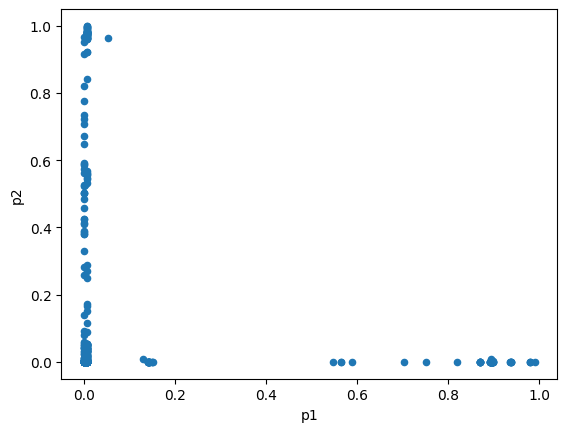

In [ ]:
#Plotting real
HC_r.plot.scatter(x='p1', y='p2', s=20)

#Low correlated features for real data

In [ ]:
plot_array = ['p1']
for i in range(len(df_r.axes[1])-1):
  y_plot = 'p' + str(i+2)
  plot_array.append(y_plot)
LC_r=df_r[plot_array]
LC_r=LC_r.head(n=1000)

In [ ]:
LC_r.loc[:,'p3']

,p3
0,0.000595
1,0.000000
2,0.000000
3,0.000000
4,0.000595
...,...
995,0.000595
996,0.000595
997,0.001786
998,0.001786


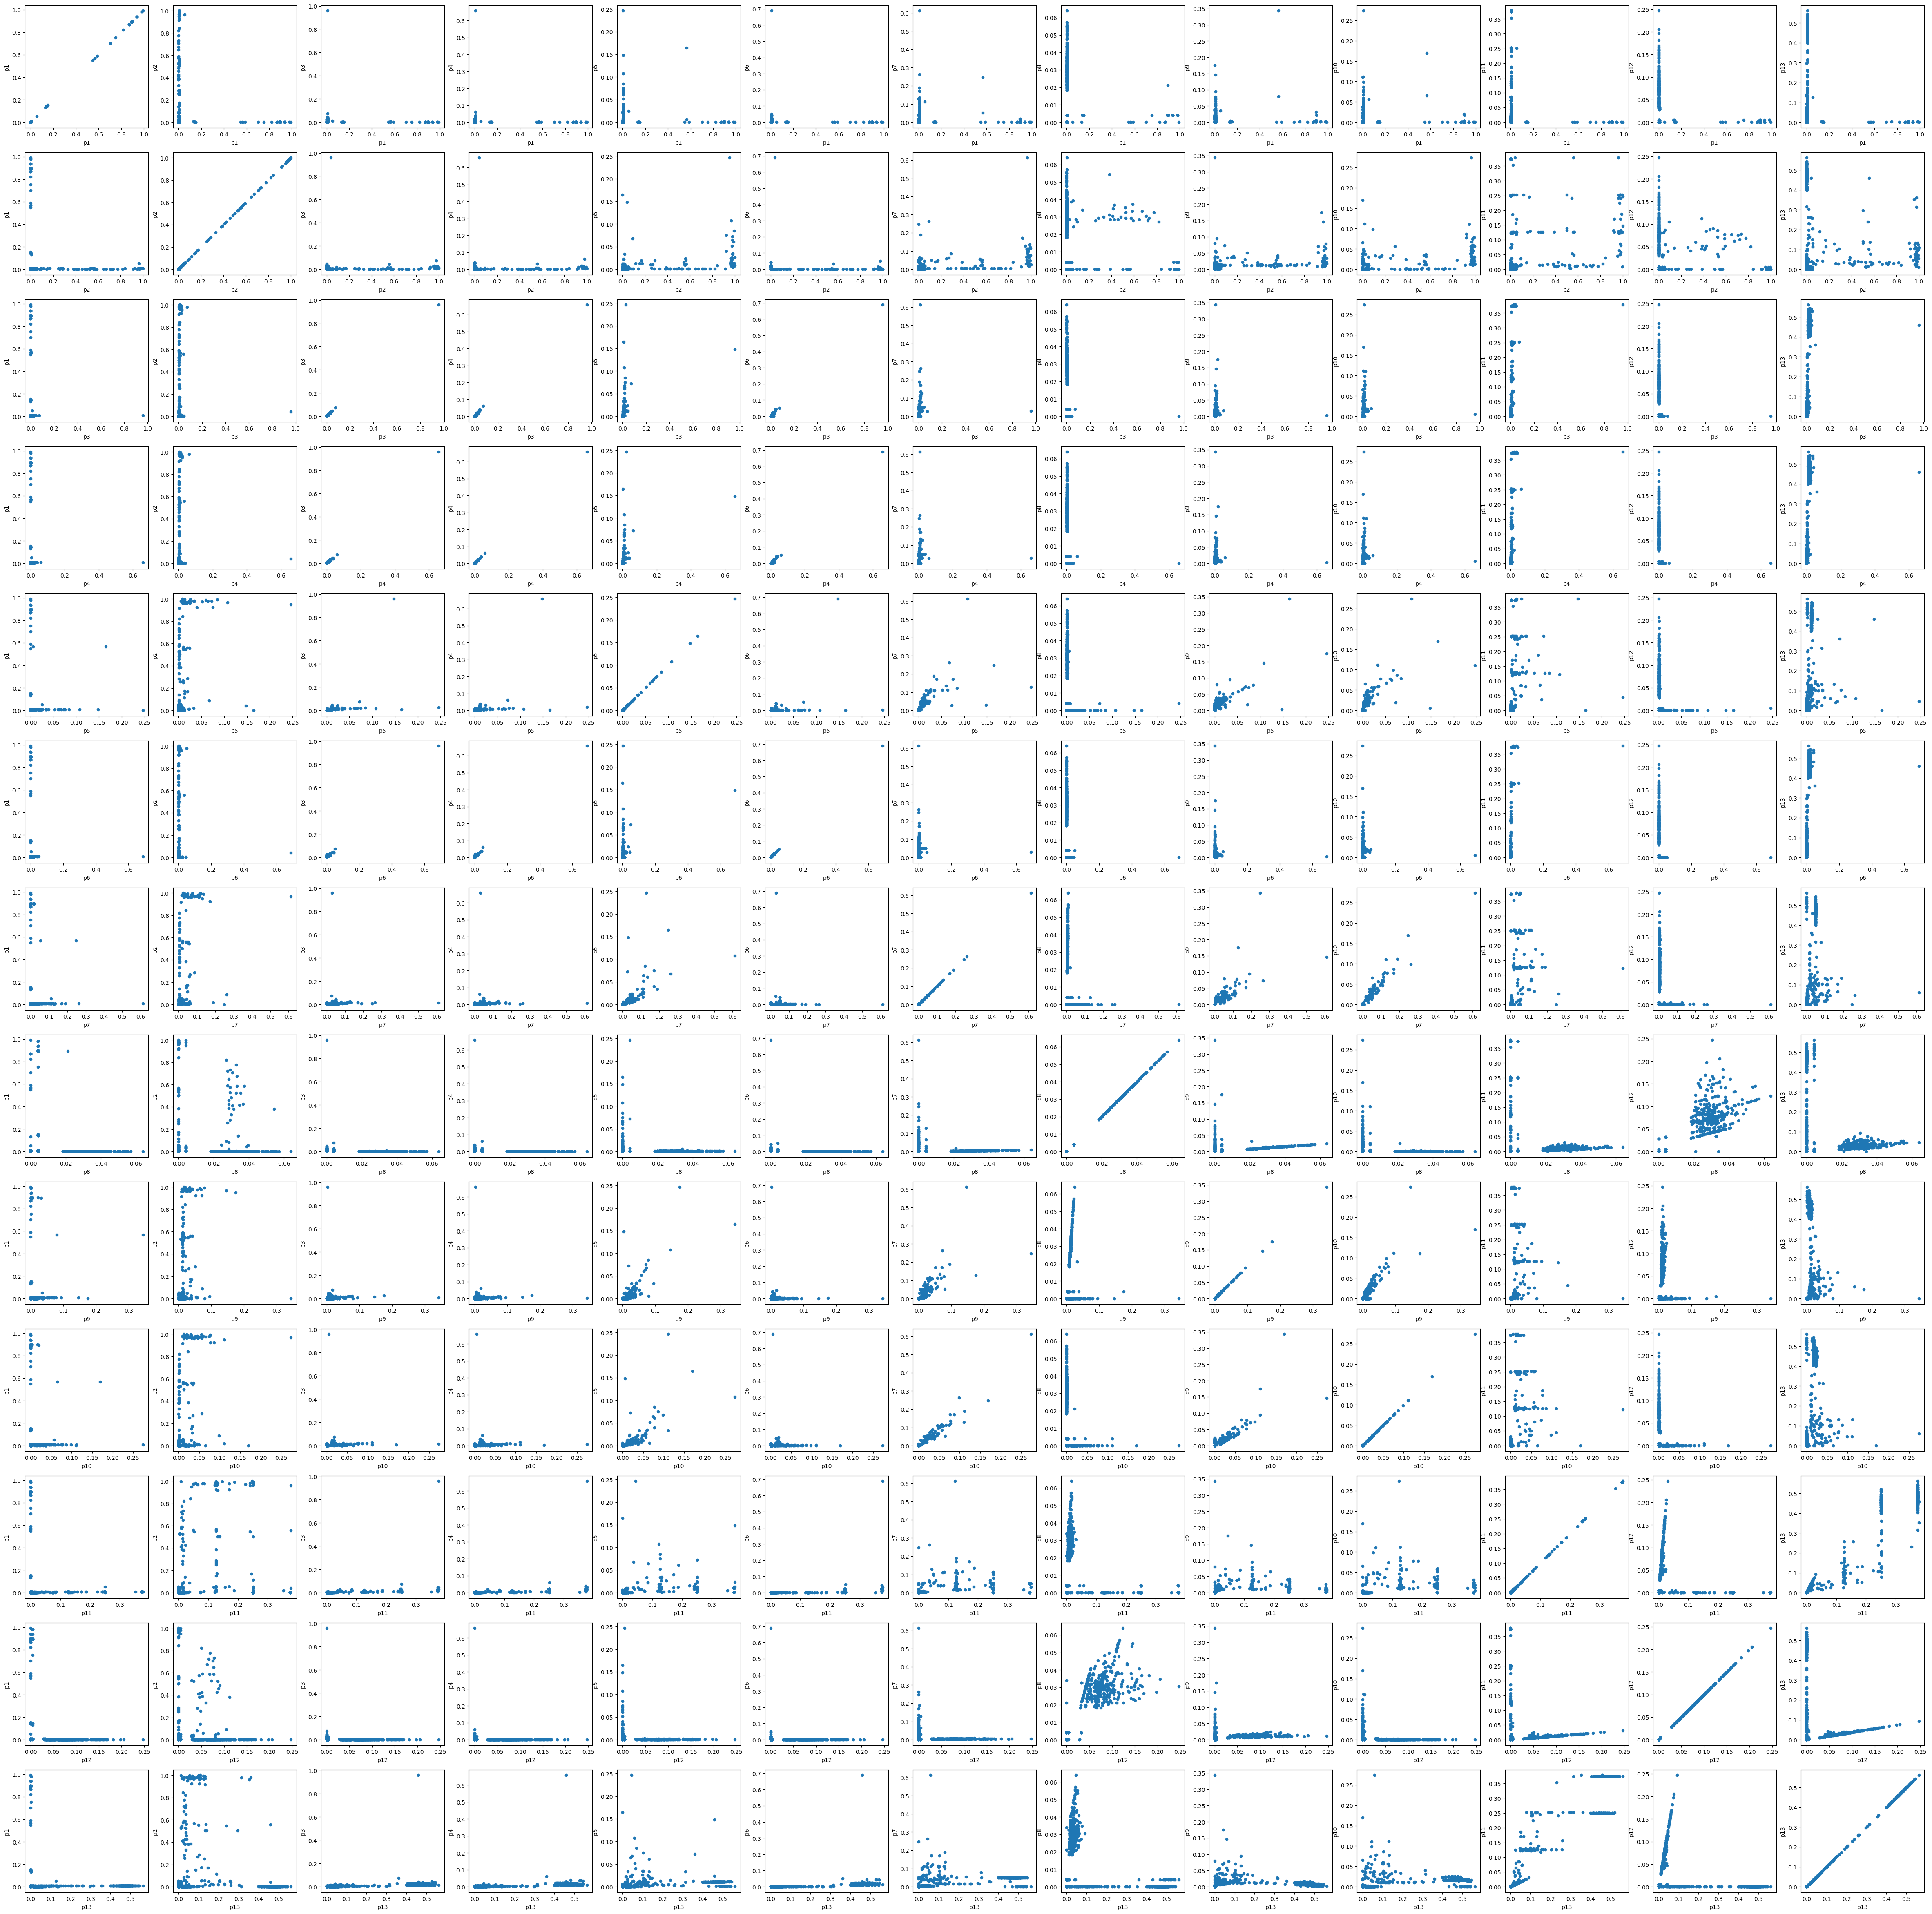

In [ ]:
chosen_feature = 'p3'
width = len(df_r.axes[1])-1
height = len(df_r.axes[1])-1
#fig, axs = plt.subplots(width, height)
fig, axs = plt.subplots(height, width, figsize = (60,60))
for i in range(len(df_r.axes[1])-1):
  for j in range(len(df_r.axes[1])-1):
    x_plot = 'p' + str(i+1)
    y_plot = 'p' + str(j+1)
    axs[i,j].scatter(LC_r.loc[:,x_plot], LC_r.loc[:,y_plot], s=20)
    axs[i,j].set_xlabel(x_plot)
    axs[i,j].set_ylabel(y_plot)

plt.show()
#plt.savefig()
#LC_r.plot.scatter(x='p3', y=df_r.axes[1][i], s=20)

In [ ]:
pdf = PdfPages("Correlations.pdf")
pdf.savefig(fig)
pdf.close()

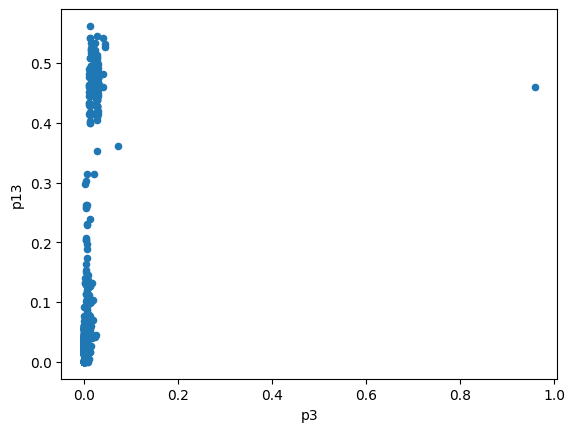

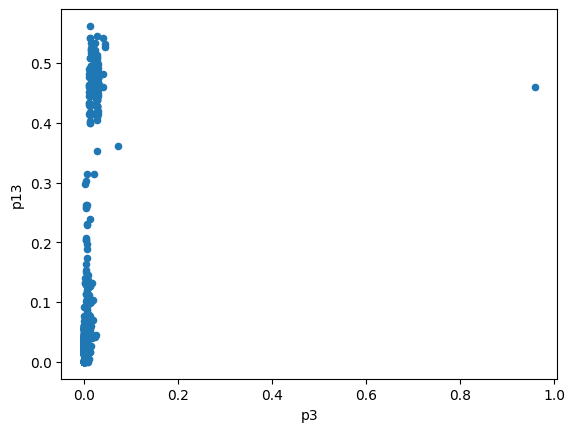

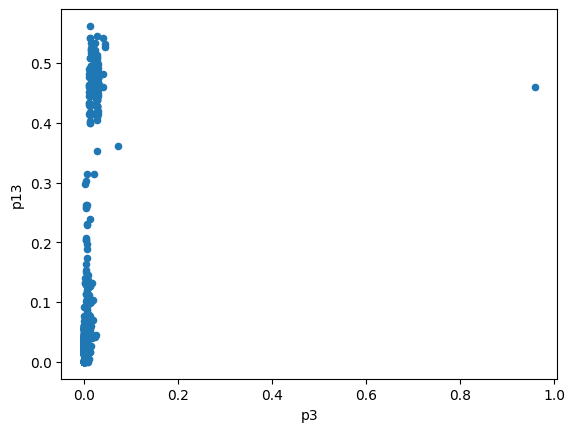

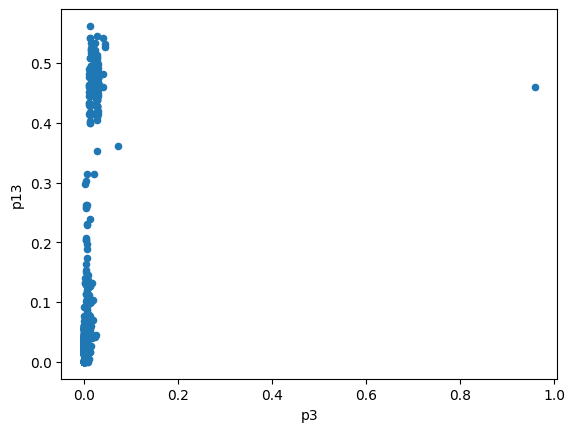

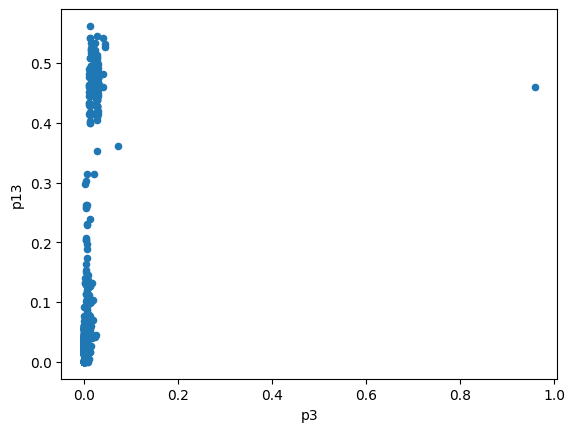

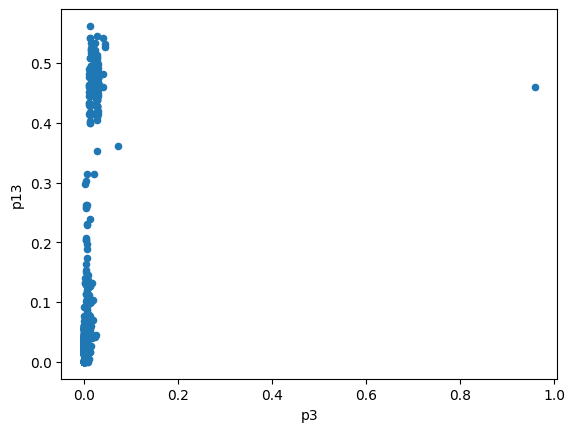

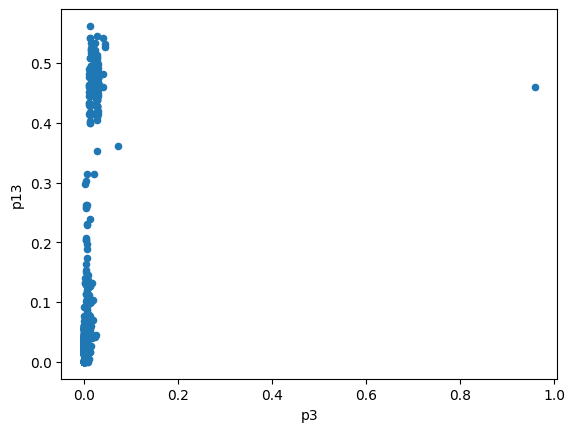

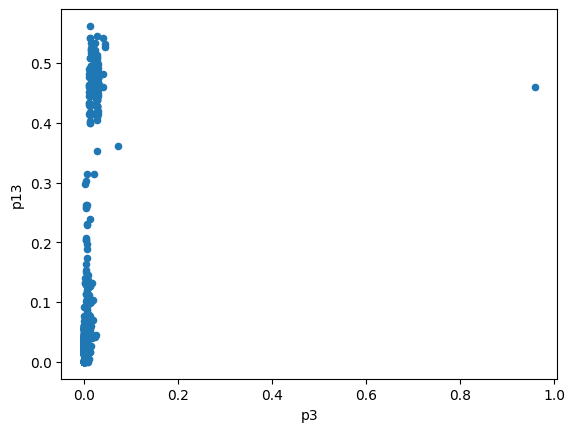

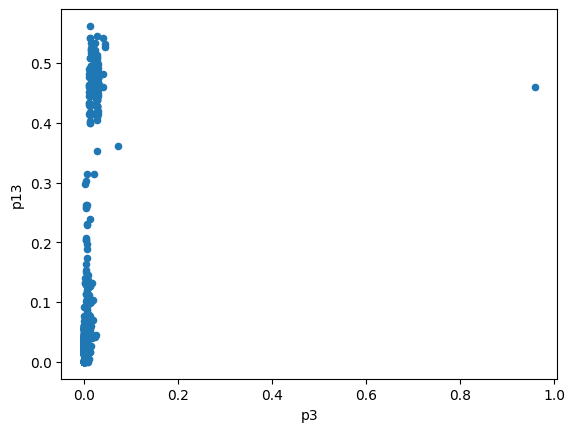

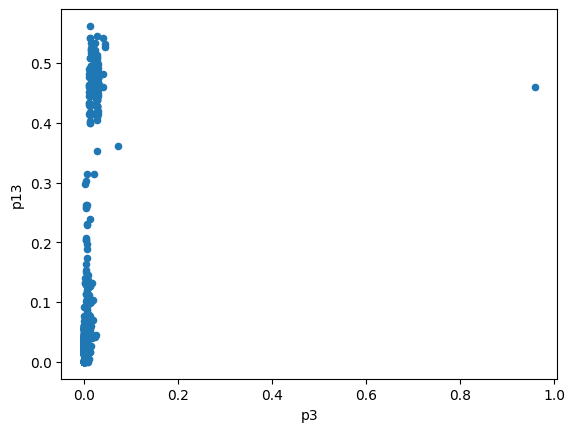

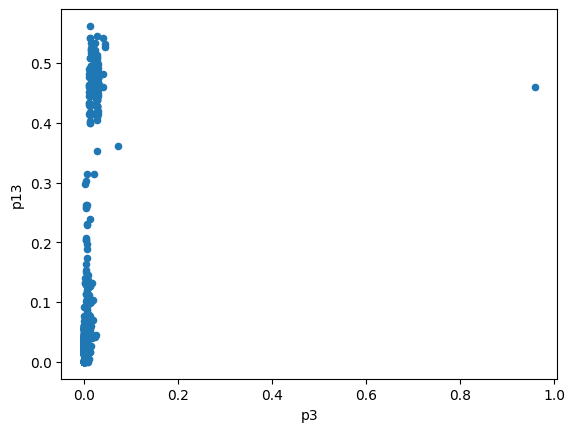

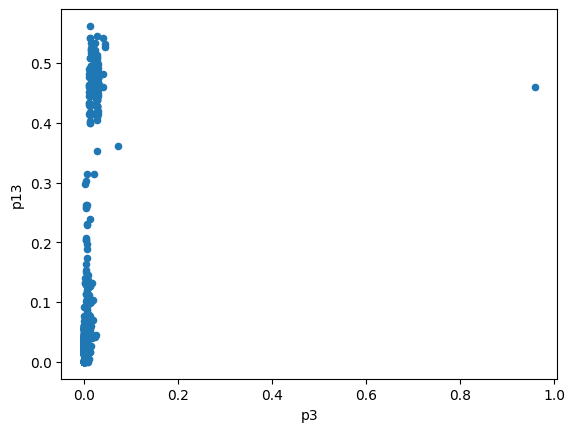

In [ ]:
chosen_feature = 'p3'
for i in range(len(df_r.axes[1])-2):
  y_plot = 'p' + str(j+1)
  LC_r.plot.scatter(x=chosen_feature, y=y_plot, s=20)

In [ ]:
print(LC_r.axes[1][14])

p15


In [ ]:
#Standarizing low correlated features for real data
LC_r = normalized_df[plot_array]
scaler.fit(LC_r)
LC_r_array=scaler.transform(LC_r)
LC_r_array.shape

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


(225745, 78)

In [ ]:
#Negatively correlated features for real data
NC_r=df_r[['p1', 'p3']]
NC_r=NC_r.head(1000)

In [ ]:
#Standarizing negatively correlated features for real data
scaler.fit(NC_r)
NC_r_array=scaler.transform(NC_r)
NC_r_array.shape

(1000, 2)

<Axes: xlabel='p1', ylabel='p3'>

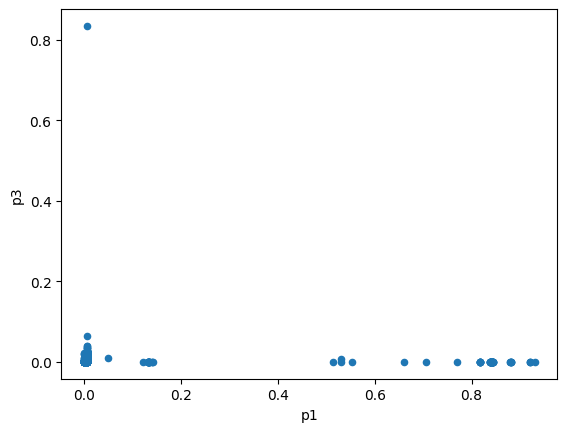

In [ ]:
NC_r.plot.scatter(x='p1', y='p3', s=20)

#Import synthetic dataset for analysis <br>


In [ ]:
#Importing synthetic data
#df_s=pd.read_csv('/content/drive/MyDrive/Dataset/SRU/Syn_SRU.csv')
#df_s=df_s.drop(['Unnamed: 0'], axis=1)
#df_s.head(3)

In [ ]:
# col=df.columns
# scaler.fit(df)
# arr=scaler.transform(df)
# df1=pd.DataFrame(arr)
# df1.columns=col

In [ ]:
# # df1=df1.abs()
# df1.head(3)

In [ ]:
# corr1=df.corr()

In [ ]:
# sns.set(rc={'figure.figsize':(10,8)})
# sns.heatmap(corr1, cmap='YlGnBu', annot=True)

In [ ]:
#Higly correlated features for synthetic data
HC_s=df_s[['p1','p2' ]]
HC_s=HC_s.head(n=1000)

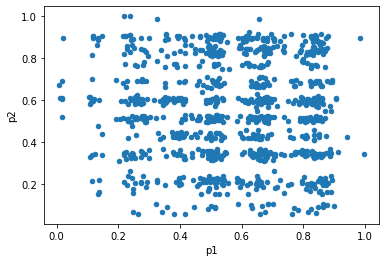

In [ ]:
#Plotting HC_s
HC_s.plot.scatter(x='p1', y='p2', s=20)

In [ ]:
#Standarizing synthetic data
scaler.fit(HC_s)
HC_s_array=scaler.transform(HC_s)
HC_s_array.shape

(1000, 2)

In [ ]:
# col=HC_s.columns
# HC_s_arr_df=pd.DataFrame(HC_s_array, columns=col)
# HC_s_arr_df.plot.scatter(x='fixed acidity', y='citric acid', s=20)

In [ ]:
# corr_hcr=HC_r.corr()
# sns.set(rc={'figure.figsize':(10,8)})
# sns.heatmap(corr_hcr, cmap='YlGnBu', annot=True)

In [ ]:
#HC.plot.scatter(x='fixed acidity', y='citric acid', s=50)

In [ ]:
#Low correlated features for Synthetic data
LC_s=df_s[['p5','p3' ]]
LC_s=LC_s.head(n=1000)

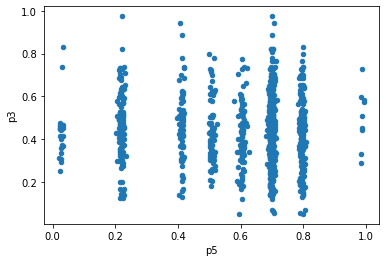

In [ ]:
LC_s.plot.scatter(x='p5', y='p3', s=20)

In [ ]:
#Standarizing low correlated features for synthetic data
scaler.fit(LC_s)
LC_s_array=scaler.transform(LC_s)
LC_s_array.shape

(1000, 2)

In [ ]:
#LC.plot.scatter(x='citric acid', y='total sulfur dioxide', s=10)

In [ ]:
#Negatively correlated features for Synthetic data
NC_s=df_s[['p1', 'p3']]
NC_s=NC_s.head(1000)

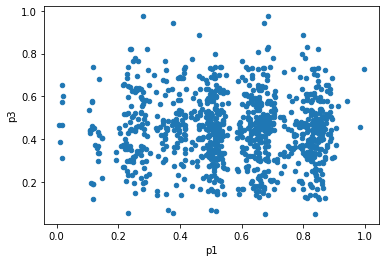

In [ ]:
NC_s.plot.scatter(x='p1', y='p3', s=20)

In [ ]:
#Standarizing negatively correlated features for synthetic data
scaler.fit(NC_s)
NC_s_array=scaler.transform(NC_s)
NC_s_array.shape

(1000, 2)

In [ ]:
#NC.plot.scatter(x='fixed acidity', y='pH', s=10)

In [ ]:
pip install -U giotto-tda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import pandas as pd
import numpy as np
#import gudhi as gd
from gtda.diagrams import PersistenceEntropy
from gtda.homology import VietorisRipsPersistence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from gtda.diagrams import Scaler
from gtda.plotting import plot_diagram
from gtda.diagrams import PairwiseDistance as pdDist
#from gudhi.wasserstein import wasserstein_distance as wd

In [ ]:
def DataReshape(data):
    d=data
    d=d.reshape(1, 1000, 2)
    return d


In [ ]:
#Generate Persistent Diagram from the datasets (Origial data and Synthetic data)
def PerDgm(OrgData, SynData):
    odata=OrgData
    sdata=SynData
    scaler1 = Scaler()

#     od_re = odata.reshape(1,300,3)
#     sd_re = sdata.reshape(1,550,2)

    od_re= DataReshape(odata) #Converting 2D array --> 3D array (Original Data)
    sd_re= DataReshape(sdata) #Converting 2D array --> 3D array (Synthetic Data)

    VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Declaring Vietoris-Rips Complex

    od_dgm= VR.fit_transform(od_re) # Computing Persistent Diagram for Original Data
    sd_dgm= VR.fit_transform(sd_re) # Computing Persistent Diagram for Synthetic Data

    od_dgm1 = scaler1.fit_transform(od_dgm) # Sclaing the persitent diagram
    sd_dgm1 = scaler1.fit_transform(sd_dgm)  # Sclaing the persitent diagram

    return od_dgm1, sd_dgm1

In [ ]:
arr=[]# Persistent diagram for Highly correlated features

arr=PerDgm(HC_s_array,HC_r_array)

In [ ]:
d1=arr[0]#Persistent diagram for synthetic data
d2=arr[1]#Persistent diagram for original data

In [ ]:
d1

array([[[0.        , 0.00557743, 0.        ],
        [0.        , 0.00578715, 0.        ],
        [0.        , 0.00842208, 0.        ],
        ...,
        [0.11792024, 0.13854221, 1.        ],
        [0.11386424, 0.1487883 , 1.        ],
        [0.        , 0.        , 2.        ]]])

In [ ]:
np.savetxt("SRU-HC-Syn.txt", d1[0], delimiter =", ")

In [ ]:
np.savetxt("SRU-HC-Real.txt", d2[0], delimiter =", ")

In [ ]:
plot_diagram(d1[0])

In [ ]:
plot_diagram(d2[0])

In [ ]:
# p=1--> Absolute difference between two persistent diagram
# p=2--> Euclidean difference between two persistent diagram

In [ ]:
dist = pdDist(metric = 'wasserstein',order=None,metric_params={'delta':0.01, 'p':2.})
dwgi = dist.fit(X=d1)
dwgi1 = dwgi.transform(d2)
print(f"Giotto wass: {dwgi1}")

Giotto wass: [[[3.83539682 1.41767874 0.01166989]]]


In [ ]:
arr1=[]# Persistent diagram for Low correlated features

arr1=PerDgm(LC_s_array,LC_r_array)

In [ ]:
d1_LC=arr1[0]#Persistent diagram for synthetic data
d2_LC=arr1[1]#Persistent diagram for original data

In [ ]:
np.savetxt("SRU-LC-Syn.txt", d1_LC[0], delimiter =", ")
np.savetxt("SRU-LC-Real.txt", d2_LC[0], delimiter =", ")

In [ ]:
plot_diagram(d1_LC[0])

In [ ]:
plot_diagram(d2_LC[0])

In [ ]:
dist_LC = pdDist(metric = 'wasserstein',order=None,metric_params={'delta':0.01, 'p':2.})
dwgi_LC = dist_LC.fit(X=d1_LC)
dwgi1_LC = dwgi_LC.transform(d2_LC)
print(f"Giotto wass: {dwgi1_LC}")

Giotto wass: [[[1.74629258e+00 4.42073456e-01 4.55793879e-04]]]


In [ ]:
arr2=[]# Persistent diagram for Low correlated features

arr2=PerDgm(NC_s_array,NC_r_array)

In [ ]:
d1_NC=arr2[0]#Persistent diagram for synthetic data
d2_NC=arr2[1]#Persistent diagram for original data

In [ ]:
np.savetxt("SRU-NC-Syn.txt", d1_NC[0], delimiter =", ")
np.savetxt("SRU-NC-Real.txt", d2_NC[0], delimiter =", ")

In [ ]:
plot_diagram(d1_NC[0])

In [ ]:
plot_diagram(d2_NC[0])

In [ ]:
dist_NC = pdDist(metric = 'wasserstein',order=None,metric_params={'delta':0.01, 'p':2.})
dwgi_NC = dist_NC.fit(X=d1_NC)
dwgi1_NC = dwgi_NC.transform(d2_NC)
print(f"Giotto wass: {dwgi1_NC}")

Giotto wass: [[[4.03835353 1.05204137 0.01010775]]]
